<a href="https://colab.research.google.com/github/KPsimo/Kidus_Football_Games/blob/main/DSRP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings #Just imported everything from Linear regression, KNN, matplotlib, scaling, and evaluation metrics. Copied from previous labs.
warnings.filterwarnings('ignore')

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import ttest_ind, ttest_rel

In [3]:
from google.colab import drive

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GAMES . CSV/games.csv')

l1 = ['game_id', 'nfl_detail_id', 'ftn']

df3 = df[l1]
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7263 entries, 0 to 7262
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        7263 non-null   object 
 1   nfl_detail_id  272 non-null    object 
 2   ftn            1376 non-null   float64
dtypes: float64(1), object(2)
memory usage: 170.4+ KB


In [4]:
df3.dropna(axis=0).info()


<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 5852 to 6123
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        272 non-null    object 
 1   nfl_detail_id  272 non-null    object 
 2   ftn            272 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.5+ KB


In [5]:
df.columns = df.columns.str.title() #Makes first letter uppercase || Had to do df.columns again for it to get updated. Not capital because only first word
df.columns = df.columns.str.replace('_', ' ') #Replaces underscore(_) with space( )
df['Surface'] = df['Surface'].str.strip() #Removes any extra characters such as spaces, used this for grass.

In [6]:
df['Temp'].median()

59.0

In [7]:
df[df['Wind']>55]
df = df.drop(index =[2396]) # Outlier wind speed (71 mph).
df= df.drop(index =[4703])# Outlier wind speed (70 mph)

In [8]:
df[df['Result']<-20]
df.columns

Index(['Game Id', 'Season', 'Game Type', 'Week', 'Gameday', 'Weekday',
       'Gametime', 'Away Team', 'Away Score', 'Home Team', 'Home Score',
       'Location', 'Result', 'Total', 'Overtime', 'Old Game Id', 'Gsis',
       'Nfl Detail Id', 'Pfr', 'Pff', 'Espn', 'Ftn', 'Away Rest', 'Home Rest',
       'Away Moneyline', 'Home Moneyline', 'Spread Line', 'Away Spread Odds',
       'Home Spread Odds', 'Total Line', 'Under Odds', 'Over Odds', 'Div Game',
       'Roof', 'Surface', 'Temp', 'Wind', 'Away Qb Id', 'Home Qb Id',
       'Away Qb Name', 'Home Qb Name', 'Away Coach', 'Home Coach', 'Referee',
       'Stadium Id', 'Stadium'],
      dtype='object')

Removing unnessecary columns

In [9]:
dropper = ['Away Qb Name', 'Home Qb Name', 'Away Qb Id', 'Home Qb Id', 'Away Coach',
               'Home Coach', 'Pff', 'Ftn', 'Pff', 'Ftn', 'Nfl Detail Id',
               'Pfr', 'Espn', 'Old Game Id', 'Gsis', 'Stadium Id', 'Stadium',
               'Under Odds', 'Over Odds', 'Div Game', 'Game Id']
fixed_df = df.drop(columns=dropper)
fixed_df.columns

fixed_df['Temp'].median()

(fixed_df['Roof'] == 'dome').sum()

fixed_df['Home Score'] = fixed_df['Home Score'].convert_dtypes('int')
fixed_df['Away Score'] = fixed_df['Away Score'].convert_dtypes('int').dropna()

fixed_df['Home Score'] = fixed_df['Home Score'].dropna()
fixed_df['Home Score']

,Home Score
0,14
1,20
2,0
3,28
4,31
...,...
7258,<NA>
7259,<NA>
7260,<NA>
7261,<NA>


In [10]:
fixed_df.loc[fixed_df['Roof'] == 'closed', 'Temp'] = fixed_df.loc[fixed_df['Roof'] == 'closed', 'Temp'].fillna(70) #had to do fixed_df.loc twice to
fixed_df.loc[fixed_df['Roof'] == 'dome', 'Temp'] = fixed_df.loc[fixed_df['Roof'] == 'dome', 'Temp'].fillna(70) #Regulated temp so I took the median to balalnce

In [11]:
fixed_df.loc[fixed_df['Roof'] == 'closed', 'Wind'] = fixed_df.loc[fixed_df['Roof'] == 'closed', 'Wind'].fillna(0) #same thing as ^^^
fixed_df.loc[fixed_df['Roof'] == 'dome', 'Wind'] = fixed_df.loc[fixed_df['Roof'] == 'dome', 'Wind'].fillna(0)
pd.set_option('display.max_columns', None)  # Shows all the columns. I google this to see all the columns when i do something like .head()

New Column for Wins

In [12]:
fixed_df['Result']

,Result
0,-3.0
1,3.0
2,-43.0
3,4.0
4,17.0
...,...
7258,NaN
7259,NaN
7260,NaN
7261,NaN


In [13]:
fixed_df['Home Result'] = ''

fixed_df.loc[fixed_df['Result'] > 0, 'Home Result'] = "Win"
fixed_df.loc[fixed_df['Result'] < 0, 'Home Result'] = "Lose"
fixed_df.loc[fixed_df['Result'] == 0, 'Home Result'] = "Draw"

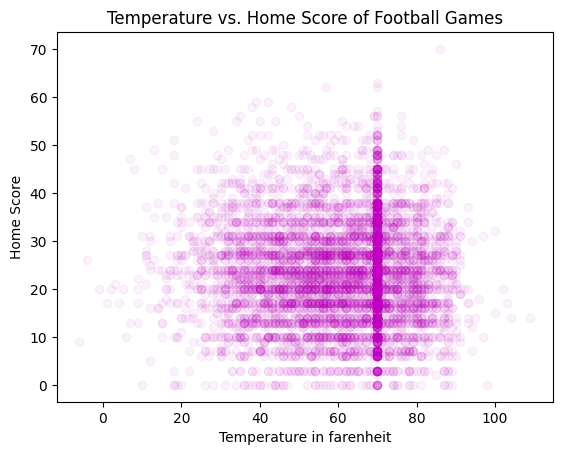

In [14]:
categories = fixed_df['Temp']
bars = fixed_df['Home Score']

plt.scatter(categories, bars, alpha = 0.05, c= 'm')
plt.title("Temperature vs. Home Score of Football Games")
plt.ylabel("Home Score")
plt.xlabel("Temperature in farenheit")
plt.show()


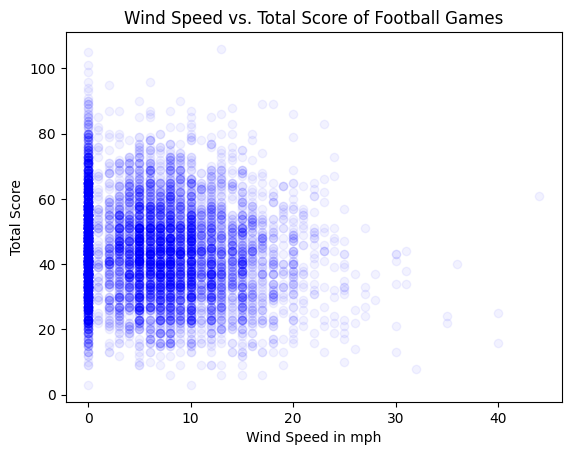

In [15]:
categories = fixed_df['Wind']
bars = fixed_df['Total']

plt.scatter(categories, bars, alpha = 0.05, c= 'b')
plt.title("Wind Speed vs. Total Score of Football Games")
plt.ylabel("Total Score")
plt.xlabel("Wind Speed in mph")
plt.show()


In [16]:
# plot_df = fixed_df[['Total Line', 'Result']].dropna()
# plot_df.isnull().value_counts()
# plot_df

# plt.bar(fixed_df['Home Rest'], fixed_df['Home Score'])
# plt.show()

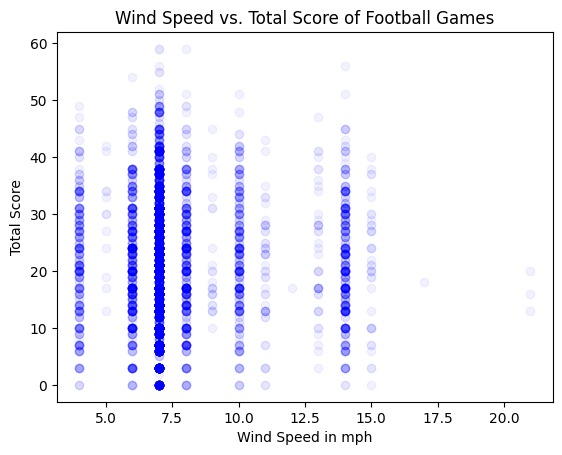

In [17]:
categories = fixed_df['Away Rest']
bars = fixed_df['Away Score']

plt.scatter(categories, bars, alpha = 0.05, c= 'b')
plt.title("Wind Speed vs. Total Score of Football Games")
plt.ylabel("Total Score")
plt.xlabel("Wind Speed in mph")
plt.show()


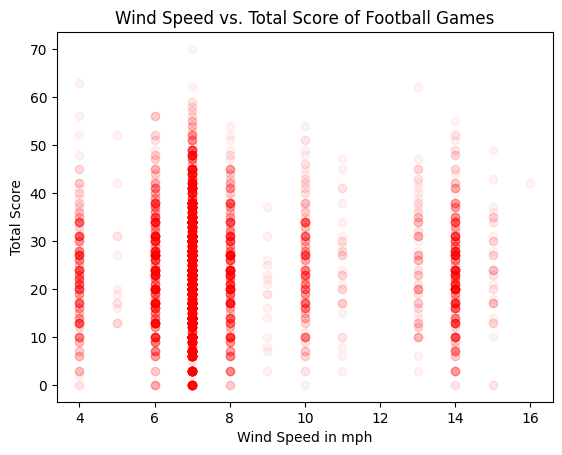

In [18]:
categories = fixed_df['Home Rest']
bars = fixed_df['Home Score']

plt.scatter(categories, bars, alpha = 0.05, c= 'r')
plt.title("Wind Speed vs. Total Score of Football Games")
plt.ylabel("Total Score")
plt.xlabel("Wind Speed in mph")
plt.show()

In [19]:
# categories = fixed_df['Surface']
# bars = fixed_df['Home Score']

# plt.bar(categories, bars, alpha = 0.05)
# plt.title("Wind Speed vs. Total Score of Football Games")
# plt.ylabel("Total Score")
# plt.xlabel("Wind Speed in mph")
# plt.show()



In [20]:
# fixed_df.info()

numeric = fixed_df.select_dtypes(exclude='object')
numeric.corr()

,Season,Week,Away Score,Home Score,Result,Total,Overtime,Away Rest,Home Rest,Away Moneyline,Home Moneyline,Spread Line,Away Spread Odds,Home Spread Odds,Total Line,Temp,Wind
Season,1.000000,0.013685,0.093779,0.057018,-0.024211,0.107920,-0.011436,0.000195,-0.030704,-0.085178,0.058530,-0.053831,-0.227437,-0.210079,0.363508,0.021290,-0.111057
Week,0.013685,1.000000,-0.017812,0.036232,0.037817,0.013741,0.007649,-0.017238,0.055375,0.020808,-0.027325,0.025357,0.034279,-0.004432,-0.000495,-0.506908,0.041958
Away Score,0.093779,-0.017812,1.000000,-0.030271,-0.708689,0.686422,0.090094,0.017282,-0.009779,-0.301247,0.288158,-0.304270,0.060339,-0.071104,0.225989,0.058179,-0.098907
Home Score,0.057018,0.036232,-0.030271,1.000000,0.726650,0.706092,0.035805,-0.018239,0.015722,0.301928,-0.291517,0.302651,-0.047779,0.028762,0.221504,-0.010406,-0.090222
Result,-0.024211,0.037817,-0.708689,0.726650,1.000000,0.026598,-0.036651,-0.024752,0.017819,0.416237,-0.400049,0.422756,-0.074475,0.068466,0.001020,-0.047255,0.004132
Total,0.107920,0.013741,0.686422,0.706092,0.026598,1.000000,0.089876,-0.001027,0.004511,0.007204,-0.008885,0.004631,0.007906,-0.029599,0.321253,0.033612,-0.135811
Overtime,-0.011436,0.007649,0.090094,0.035805,-0.036651,0.089876,1.000000,0.014034,0.003585,-0.012099,0.019220,-0.010164,0.004486,-0.001022,-0.019121,-0.017649,0.002216
Away Rest,0.000195,-0.017238,0.017282,-0.018239,-0.024752,-0.001027,0.014034,1.000000,0.234837,-0.028212,0.026099,-0.024820,-0.009781,0.010132,0.023429,0.000843,0.022536
Home Rest,-0.030704,0.055375,-0.009779,0.015722,0.017819,0.004511,0.003585,0.234837,1.000000,0.044770,-0.042532,0.045261,-0.001815,-0.000135,0.021414,-0.028805,0.026669
Away Moneyline,-0.085178,0.020808,-0.301247,0.301928,0.416237,0.007204,-0.012099,-0.028212,0.044770,1.000000,-0.965462,0.973713,-0.092572,0.115825,-0.010786,-0.063993,0.011528


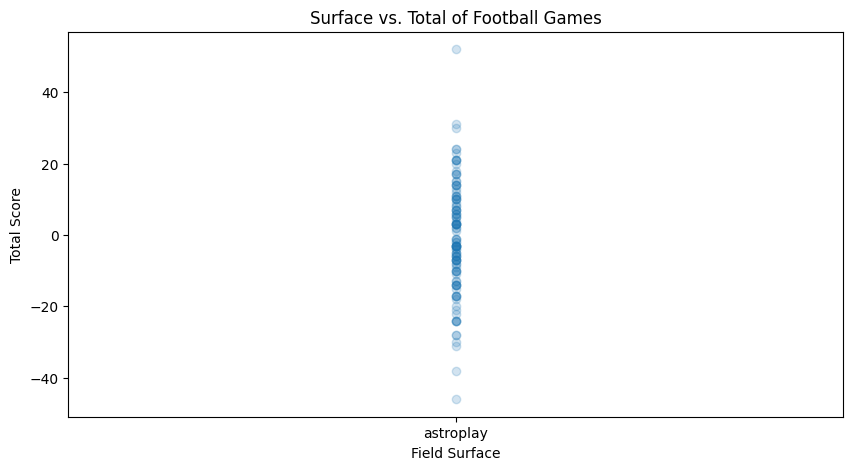

In [21]:
plot_df = fixed_df[fixed_df['Surface'] == 'astroplay'][['Surface', 'Result']].dropna()

categories = plot_df['Surface']
bars = plot_df['Result']

plt.figure(figsize=(10, 5))
plt.scatter(categories, bars, alpha = 0.2)
plt.title("Surface vs. Total of Football Games")
plt.ylabel("Total Score")
plt.xlabel("Field Surface")
plt.show()


In [22]:
fixed_df1 = fixed_df.loc[fixed_df['Result'].notna(), :]

In [23]:
fturf_scores = fixed_df[fixed_df['Surface'] == 'fieldturf']['Total'].dropna()
grass_scores = fixed_df[fixed_df['Surface'] == 'grass']['Total'].dropna()

In [24]:
t_stat, p_val = ttest_ind(fturf_scores, grass_scores)
print(f"T-Stat: {t_stat}, P-Value: {p_val}\n")

T-Stat: 5.001108398515901, P-Value: 5.871476926355395e-07



In [26]:
aplay_scores = fixed_df[fixed_df['Surface'] == 'astroplay']['Total'].dropna()
grass_scores = fixed_df[fixed_df['Surface'] == 'grass']['Total'].dropna()

t_stat1, p_val1 = ttest_ind(aplay_scores, grass_scores)
print(f"T-Stat: {t_stat1}, P-Value: {p_val1}\n")

T-Stat: -2.6007281605288797, P-Value: 0.009336054332385775

